In [ ]:
#Este programa contém os código demonstrados na aula sobre Aplicação de ML+IoT para o Healthcare(previsão de arritmia)

In [ ]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive  ####### já havia copiado para o drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#importando as bibliotecas

import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"

from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes

import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"

import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos

from sklearn.svm import SVC #utilizada para importar o algoritmo SVM

print('Bibliotecas importadas!')

Bibliotecas importadas!


In [13]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nomeArquivo = '/content/drive/My Drive/Colab Notebooks/Dados/data.csv' 
dataset = pd.read_csv(nomeArquivo, sep=',') #realiza a leitura do banco de dados

# New Section

In [14]:
#print do dataset
dataset.head() # são 76 colunas, mas nem todas serão utilizadas para realizar a previsão de doença cardíaca

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,0.0,289.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.0,18.0,NaN,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,NaN,26.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,20.0,84.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,1.0,180.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,9.0,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.0,14.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,20.0,84.0,1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,0.0,283.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.0,10.0,NaN,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,NaN,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,26.0,84.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,0.0,214.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.0,5.0,4.0,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.0,19.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,30.0,84.0,3,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.0,2.0,NaN,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,NaN,13.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,84.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [15]:
dataset.shape # mostra a dimensão do dataset

(617, 76)

In [16]:
#conhecendo o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           617 non-null    int64  
 1   ccf                           617 non-null    int64  
 2   age                           617 non-null    int64  
 3   sex                           617 non-null    int64  
 4   pain location                 617 non-null    int64  
 5   pain w exertion               617 non-null    int64  
 6   relieved after rest           613 non-null    float64
 7   pncaden                       0 non-null      float64
 8   chest pain type               617 non-null    int64  
 9   resting bp s                  558 non-null    float64
 10  hypertension                  583 non-null    float64
 11  cholesterol                   587 non-null    float64
 12  smoker                        230 non-null    float64
 13  cigar

In [33]:
### verificando quais colunas tem nulos
dataset.columns[dataset.isnull().any()]

Index(['relieved after rest', 'pncaden', 'resting bp s', 'hypertension',
       'cholesterol', 'smoker', 'cigarettes per day', 'years of smoking',
       'fasting blood sugar', 'diabetes', 'family hist', 'resting ecg',
       'ekg month', 'ekg day', 'ekg yr', 'digitalis', 'beta blocker',
       'nitrates', 'calcium channel blocker', 'diuretic', 'exercise protocol',
       'duration of exercise', 'thaltime', 'mets achieved', 'max heart rate',
       'resting heart rate', 'peak exercise bp 1', 'peak exercise bp 2',
       'dummy 1', 'resting bp d', 'exercise angina', 'xhypo', 'oldpeak',
       'ST slope', 'ST height at rest', 'ST heaight at peak', 'flouroscopy',
       'dummy 2', 'dummy 3', 'resting ejection fraction',
       'rest wall motion abnormality', 'exercise ejection fraction',
       'exercsie wall motion', 'thal', 'dummy 4', 'dummy 5', 'dummy 6',
       'cath month', 'cath day', 'cath yr', 'lmt', 'ladprox', 'laddist',
       'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 

In [35]:
### Quantas colunas tem nulos? ############### maneira 1
len(dataset.columns[dataset.isnull().any()])

67

In [39]:
### Colunas com valores nulos ########### maneira 2
dataset.isnull().any().sum()

67

In [38]:
### linhas com valores nulos
dataset.isnull().any(axis=1).sum()

617

In [40]:
### analisando o dataset
dataset.describe()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13
count,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,613.000000,0.0,617.000000,558.000000,583.000000,587.000000,230.000000,202.000000,190.000000,527.000000,72.000000,195.000000,615.000000,564.000000,563.000000,564.000000,551.000000,553.000000,554.000000,556.000000,537.000000,505.000000,561.000000,233.000000,512.000000,562.000000,561.000000,554.000000,554.000000,558.000000,558.000000,562.000000,559.000000,555.000000,309.000000,474.000000,475.000000,11.000000,0.0,1.0,28.000000,30.000000,2.000000,5.000000,142.000000,130.000000,44.000000,1.0,606.000000,608.000000,608.000000,617.000000,342.000000,381.000000,371.000000,341.000000,382.000000,332.000000,346.000000,327.000000,372.000000,347.000000,598.000000,598.000000,598.000000,598.000000,601.000000,311.000000,119.000000
mean,1325.489465,0.0,53.055105,0.842788,0.920583,0.593193,0.672104,NaN,3.294976,132.372760,0.408233,174.579216,0.517391,22.133663,23.952632,0.176471,0.944444,0.482051,0.414634,5.758865,15.628774,84.934397,0.036298,0.256781,0.276173,0.208633,0.111732,57.229703,8.775223,6.428755,20.189648,131.042705,75.673797,173.465704,91.644404,132.372760,82.804659,0.423488,0.028623,0.790991,1.932039,14.398734,14.145263,1.545455,NaN,0.0,0.531071,1.033333,0.550000,0.200000,5.690141,1.284615,0.295455,0.0,5.993399,16.286184,84.550987,1.230146,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.470430,1.207493,1.030100,1.048495,1.132107,1.705686,1.194676,27.623119,5.869748
std,1294.916561,0.0,9.582869,0.364296,0.270607,0.491637,0.469830,NaN,0.913743,19.828097,0.491929,124.349962,0.500787,16.146930,16.428871,0.381582,0.230669,0.500964,0.611066,3.306489,8.804259,1.123440,0.187200,1.013976,0.447508,0.406697,0.315330,52.784478,4.206623,4.299778,37.762087,25.151341,15.183479,26.601875,13.464101,19.828097,10.558013,0.494551,0.166893,1.041776,0.585465,5.702942,5.697171,2.621589,NaN,NaN,0.146195,1.066200,0.070711,0.447214,1.795120,0.958314,0.461522,NaN,3.336246,8.866408,5.140596,1.263447,8.706091,0.499399,0.449764,0.402339,0.490647,0.318847,0.391167,0.250887,0.499797,0.406097,0.336148,0.503910,0.673205,1.834072,0.541946,31.675295,1.650914
min,1.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,60.000000,37.000000,100.000000,11.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000,2.000000,2.000000,0.000000,NaN,0.0,0.220000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.220000,3.300000
25%,157.000000,0.0,47.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,120.000000,0.000000,0.000000,0.000000,15.000000,8.500000,0.000000,1.000000,0.000000,0.000000,3.000000,8.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.500000,5.000000,114.250000,65.000000,158.000000,80.000000,120.000000

In [41]:
### somente a média de cada coluna

dataset.mean()

_id              1325.489465
ccf                 0.000000
age                53.055105
sex                 0.842788
pain location       0.920583
                    ...     
dummy 9             1.132107
dummy 10            1.705686
dummy 11            1.194676
dummy 12           27.623119
dummy 13            5.869748
Length: 75, dtype: float64

**Existem vários dados nulos**

In [85]:
#tratando os dados nulos
dataset.fillna(dataset.mean(), inplace=True) #substitui os dados que estão como NAN pela média dos valores na coluna
dataset.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,0.0,289.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.000000,18.0,6.428755,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,1.932039,26.0,20.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,12.0,20.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,1.0,180.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,57.229703,10.0,9.000000,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.000000,14.0,13.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,11.0,20.0,84.0,1,1.555556,1.464567,2.000000,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,0.0,283.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.000000,10.0,6.428755,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,1.932039,17.0,14.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,11.0,26.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,0.0,214.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.000000,5.0,4.000000,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.000000,19.0,22.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,9.0,30.0,84.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,1.187861,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,0.0,174.579216,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.000000,2.0,6.428755,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,1.932039,13.0,9.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,7.0,30.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.000000,1.114458,1.187861,1.067278,1.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


**Preparando os dados**

In [87]:
dataset_to_array = np.array(dataset) #transforma o dataframe em array para facilitar a escolha dos dados a serem utilizados

In [88]:
dataset_to_array

array([[1254, 0, 40, ..., 27.623118971061086, 5.8697478991596626, 'name'],
       [1255, 0, 49, ..., 27.623118971061086, 5.8697478991596626, 'name'],
       [1256, 0, 37, ..., 27.623118971061086, 5.8697478991596626, 'name'],
       ...,
       [202, 0, 55, ..., 0.69, 5.6, 'name'],
       [116, 0, 58, ..., 0.81, 6.0, 'name'],
       [160, 0, 62, ..., 27.623118971061086, 5.8697478991596626, 'name']],
      dtype=object)

In [89]:
target = dataset_to_array[:,57] # esse é o vetor de saída (target)  ### todas as linhas, coluna 57, variável target do dataset
target= target.astype('int') #indica o tipo de dados
#target[target>0] = 1 # 0 para o coração saudável e 1 para problema detectado
target

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

**Iniciando a previsão**

In [90]:
#dados coletados pelos sensores
dataset_sensor = np.column_stack(( 
    dataset_to_array[:,11], # pressão sanguínea em repouso
    dataset_to_array[:,33], # frequencia máxima atingida
    dataset_to_array[:,34], # frequencia cardíaca em repouso
    dataset_to_array[:,35], # pico de pressão sanguínea durante exercício 
    dataset_to_array[:,36], # pico de pressão sanguínea durante exercício  
    dataset_to_array[:,38] # pressão sanguínea em repouso
 ))

In [91]:
#dataset com os dados médicos do paciente
dataset_medico = np.column_stack((dataset_to_array[:,4] , # localização da dor
    dataset_to_array[:,6] , # alivio após o cansaço
    dataset_to_array[:,9] , # tipo de dor 
    dataset_to_array[:,39], # angina induzida pelo exercício (1 = sim; 0 = nao) 
    dataset.age, # idade 
    dataset.sex , # sexo
    dataset.hypertension # hipertensão
 ))

In [92]:
#concatena as duas bases de dados
dataset_paciente=np.concatenate((dataset_medico,dataset_sensor),axis=1)
dataset_paciente

array([[1, 0.0, 140.0, ..., 140.0, 86.0, 0.0],
       [1, 0.0, 160.0, ..., 160.0, 90.0, 0.0],
       [1, 0.0, 130.0, ..., 130.0, 80.0, 0.0],
       ...,
       [1, 1.0, 122.0, ..., 122.0, 70.0, 0.0],
       [1, 1.0, 132.37275985663084, ..., 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [1, 0.0, 120.0, ..., 120.0, 80.0, 0.0]], dtype=object)

In [93]:
dataset_paciente.shape

(617, 13)

In [94]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, target, random_state = 223)

In [95]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [96]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Analisando a performance do modelo**

In [98]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste

In [102]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.5419354838709678 
Em porcentagem :  54.0 %



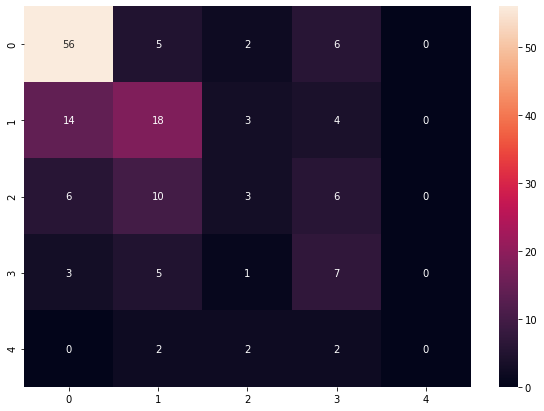

In [103]:
#criando a matriz de confusão
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsao) #gera a matriz de confusão
df_cm = pd.DataFrame(cm, index = [i for i in "01234"],columns = [i for i in "01234"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura 
sn.heatmap(df_cm, annot=True) #plota a figura


**Modificando o Dataset**

In [104]:
#vamos escolher apenas 13 atributos para realizar a previsão de doenças cardíacas

dataset_to_array = np.array(dataset)
label = dataset_to_array[:,57] # "Target" classes binárias 0 e 1
label = label.astype('int')
label[label>0] = 1 # Quando os dados são 0 está saldável e 1 doente

In [106]:
label

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [107]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, label, random_state = 223)

In [108]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [109]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste

In [111]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.7419354838709677 
Em porcentagem :  74.0 %



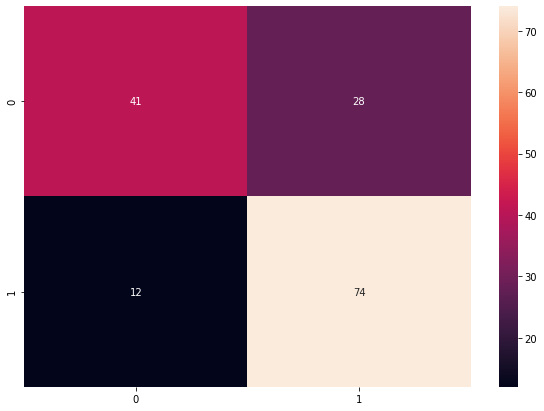

In [113]:
#criando a matriz de confusão
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsao) #gera a matriz de confusão
df_cm = pd.DataFrame(cm, index = [i for i in "01"],columns = [i for i in "01"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura 
sn.heatmap(df_cm, annot=True) #plota a figura
